In [1]:
# Importing YOLO
!pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.183  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i5-12450H)
Setup complete  (12 CPUs, 15.7 GB RAM, 14.3/100.0 GB disk)


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load pretrained YOLO model
model = YOLO("yolov8n.pt")  # n = nano (lightweight); you can use yolov8s.pt, yolov8m.pt, etc.


In [8]:
results = model("bmw.jpg")  # returns a list

# Access first result
result = results[0]

# Show detections
result.show()

# Save detections
result.save(filename="bmw_detected.jpg")  # saves with bounding boxes



image 1/1 d:\Python\Deep Learning\YOLO ASS 7\bmw.jpg: 448x640 3 cars, 175.7ms
Speed: 6.0ms preprocess, 175.7ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


'bmw_detected.jpg'

In [9]:
results = model("bmw.jpg")
result = results[0]

# Save the result image
result.save(filename="bmw_detected.jpg")
print("Saved as bmw_detected.jpg")



image 1/1 d:\Python\Deep Learning\YOLO ASS 7\bmw.jpg: 448x640 3 cars, 161.6ms
Speed: 4.0ms preprocess, 161.6ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)
Saved as bmw_detected.jpg


In [10]:
for box in result.boxes:
    cls_id = int(box.cls[0])   # class id
    conf = float(box.conf[0])  # confidence
    xyxy = box.xyxy[0].tolist()  # [x1, y1, x2, y2]

    print("Class:", model.names[cls_id],
          "Confidence:", round(conf, 2),
          "Box:", xyxy)


Class: car Confidence: 0.88 Box: [87.62276458740234, 108.89337158203125, 499.4726257324219, 357.74224853515625]
Class: car Confidence: 0.48 Box: [113.20105743408203, 149.72262573242188, 162.83091735839844, 196.39239501953125]
Class: car Confidence: 0.34 Box: [0.0, 206.3995819091797, 26.821298599243164, 330.08428955078125]


Press SPACE to capture image, ESC to exit

0: 480x640 7 persons, 4 chairs, 1 laptop, 83.4ms
Speed: 2.6ms preprocess, 83.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Captured and saved as captured_image.jpg


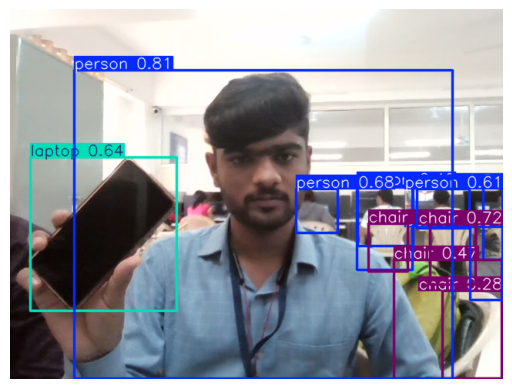


0: 480x640 7 persons, 4 chairs, 1 laptop, 116.9ms
Speed: 3.3ms preprocess, 116.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Captured and saved as captured_image.jpg


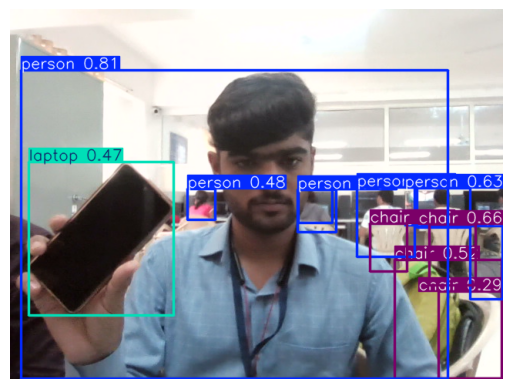

In [16]:
print("Press SPACE to capture image, ESC to exit")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow("YOLOv8 Webcam - Press SPACE to Capture", frame)
    key = cv2.waitKey(1)
    
    if key == 27:  # ESC
        break
    elif key == 32:  # SPACE
        results = model(frame)
        annotated_frame = results[0].plot()
        
        cv2.imwrite("captured_image.jpg", annotated_frame)
        print("Captured and saved as captured_image.jpg")
        
        # Display inside notebook
        img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.show()

cap.release()
cv2.destroyAllWindows() 